# Laboratorio 4 - Regresión y Clustering

## Paula Hípola Gómez, José Ignacio Navas Sanz y Belén Ortega Pérez

## Entregable 3 - Bodega de Vino

In [1]:
%config IPCompleter.greedy=True
%reset
#Importamos las librerías necesarias
#Numpy
import numpy as np
#Pandas
import pandas as pd
#Scikit-Learn
import sklearn as sk
#Matplotlib
import matplotlib.pyplot as plt

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

### Carga y Visualización de Datos

In [3]:
#Importamos el CSV
dataset = pd.read_csv('vinos.csv')
#Guardamos una copia del dataset original
datasetOriginal = dataset
#Mostramos los datos
dataset

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


### Limpieza de Datos

In [4]:
#Datos nulos
nulos = pd.DataFrame(dataset.isna().sum(), columns=["Número de nulos"])
nulos

,Número de nulos
Alcohol,0
Malic_Acid,0
Ash,0
Ash_Alcanity,0
Magnesium,0
Total_Phenols,0
Flavanoids,0
Nonflavanoid_Phenols,0
Proanthocyanins,0
Color_Intensity,0


No hay datos nulos por lo que podemos continuar sin problemas a la comprobación de "missing values"

In [5]:
#Datos missing
missing = pd.DataFrame(dataset.isnull().sum(), columns=["Número de missing values"])
missing

,Número de missing values
Alcohol,0
Malic_Acid,0
Ash,0
Ash_Alcanity,0
Magnesium,0
Total_Phenols,0
Flavanoids,0
Nonflavanoid_Phenols,0
Proanthocyanins,0
Color_Intensity,0


No hay 'missing values' por lo que podemos continuar sin problemas al siguiente paso, comprobar repetidos

In [6]:
tamOrig = dataset.shape
print('Tamaño del dataset sin eliminar datos duplicados: ', tamOrig)
dataset = dataset.drop_duplicates()
nuevoTam = dataset.shape
print('Eliminando los duplicados, el dataset queda del tamaño: ', nuevoTam)
if tamOrig == nuevoTam:
    print('No hay datos duplicados')
else:
    print('Se han eliminado,', tamOrig[0] - nuevoTam[0],'datos duplicados')

Tamaño del dataset sin eliminar datos duplicados:  (178, 13)
Eliminando los duplicados, el dataset queda del tamaño:  (178, 13)
No hay datos duplicados


Ya hemos terminado el apartado de la limpieza de los datos, pasamos a preprocesarlos

### Preprocesamiento de Datos

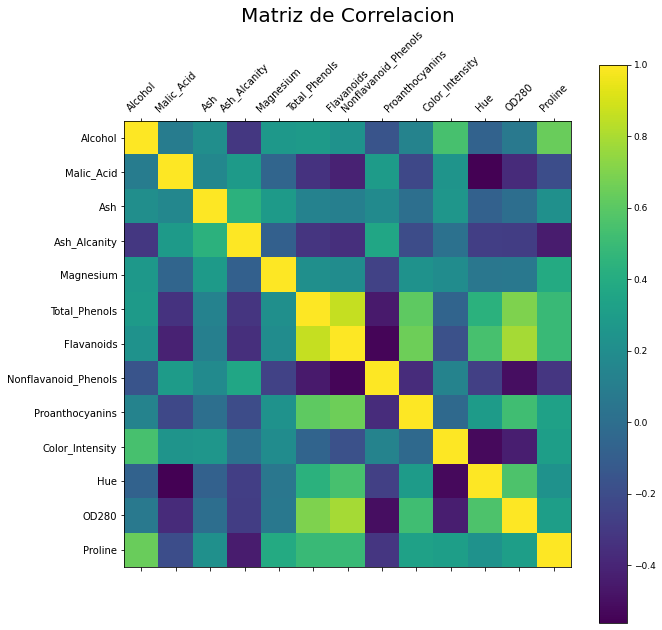

In [16]:
matrizC = plt.figure(figsize=(10, 10))

plt.matshow(dataset.corr(), fignum = matrizC.number)
plt.title('Matriz de Correlacion', size='20')
plt.xticks(range(dataset.shape[1]), dataset.columns, fontsize=10, rotation=45)
plt.yticks(range(dataset.shape[1]), dataset.columns, fontsize=10)

leyenda = plt.colorbar()
leyenda.ax.tick_params(labelsize=9)

In [41]:
from sklearn.preprocessing import StandardScaler
datosTransformados = StandardScaler().fit_transform(dataset)
datosTransformados = pd.DataFrame(datosTransformados)
datosTransformados

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


El dendograma nos ayuda a elegir el número de clusters necesarios

In [42]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_,model.distances_,counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

Una vez tenemos el dendograma podemos ver el número de clusters más óptimo para implementar en el Agglomerative Clustering

### Como se nos pide que utilicemos 'single linkage' vamos a quedarnos con la configuración de este dendograma.

### Para Single, podemos utilizar las siguientes distancias - “euclidean”, “l1”, “l2”, “manhattan”, “cosine”, or “precomputed” -- La única excepcion es que si aplicamos Precomputed, necesitamos una matriz de distancias entre los elementos

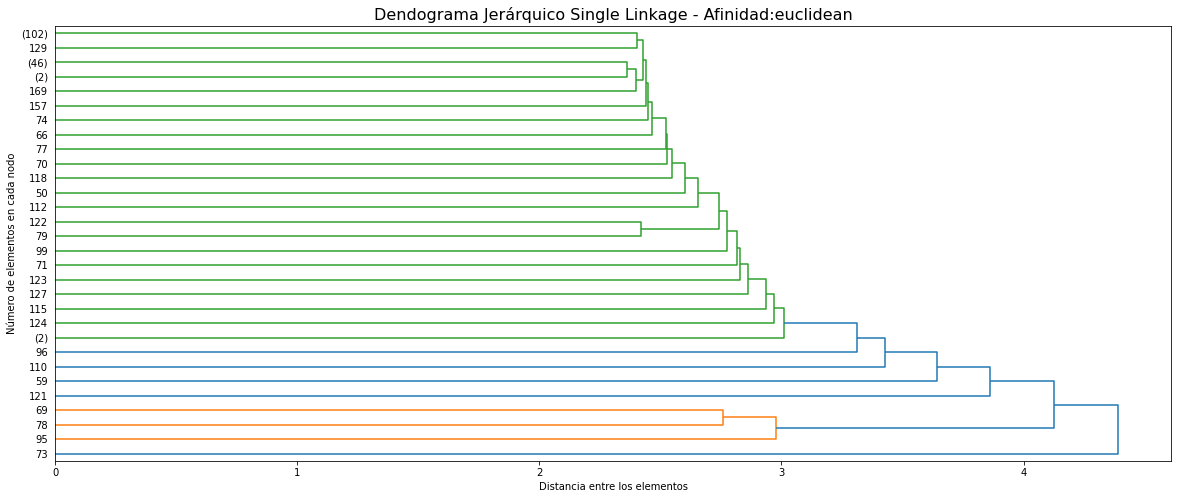

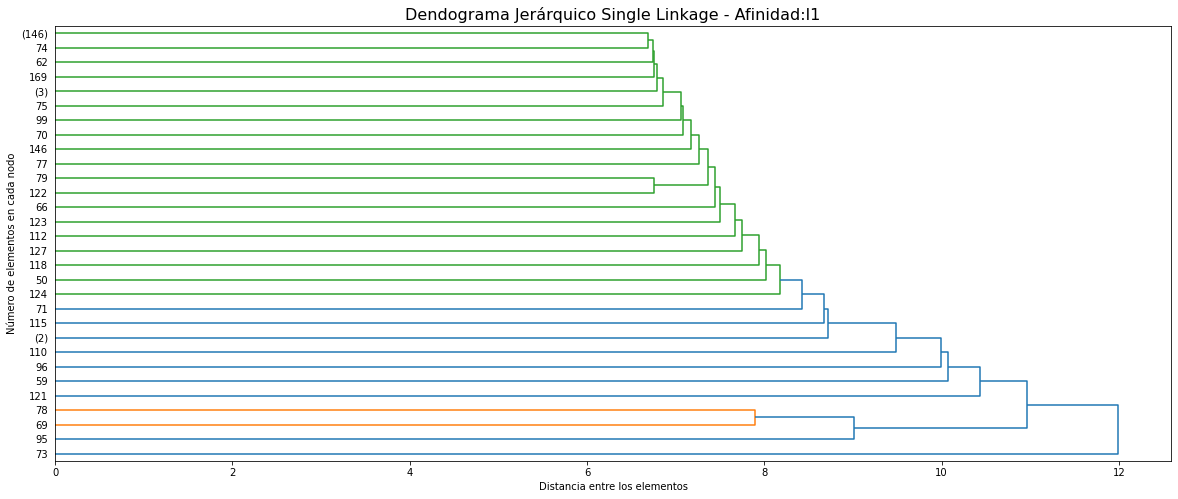

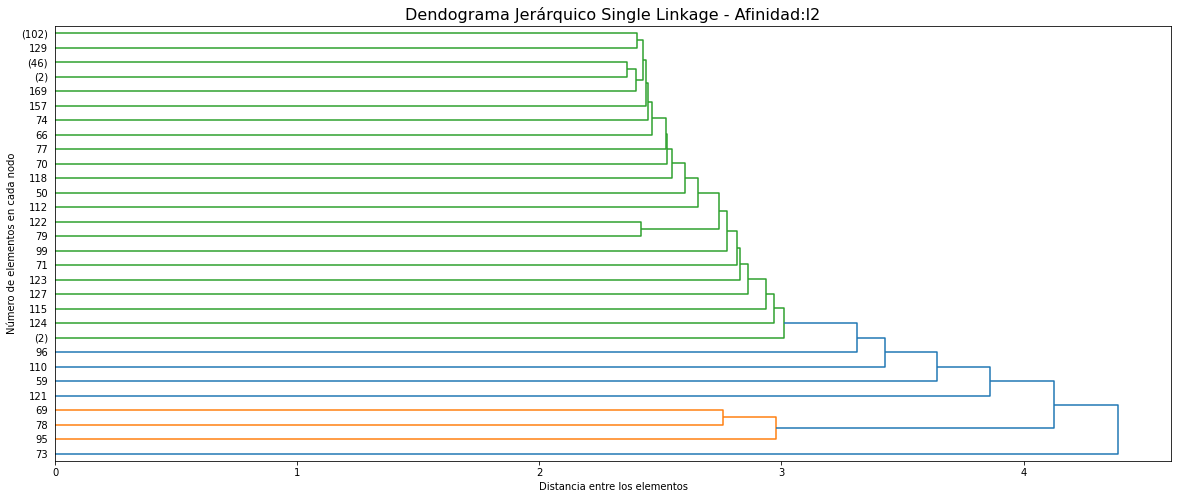

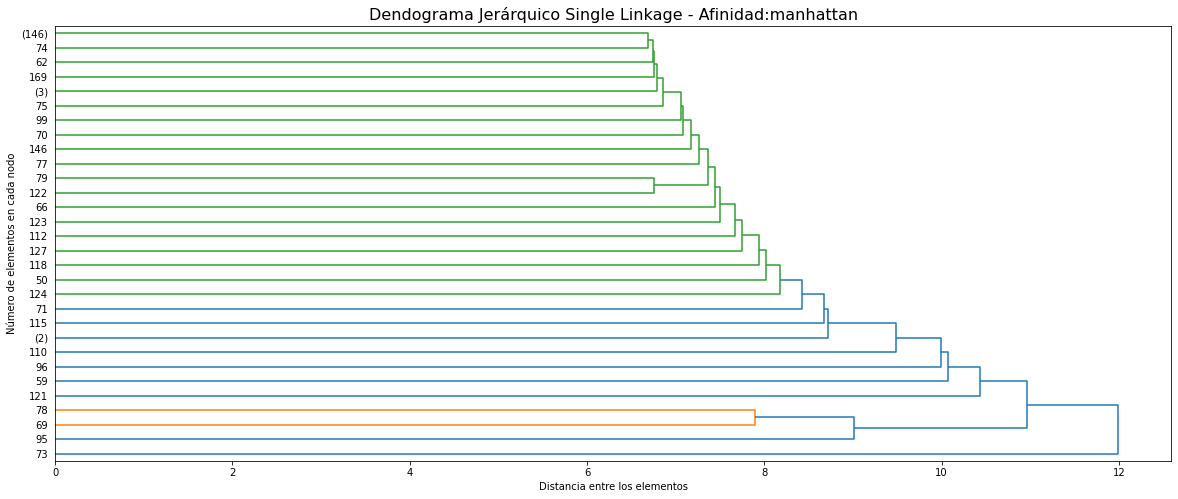

Calculando Matriz de Distancias...


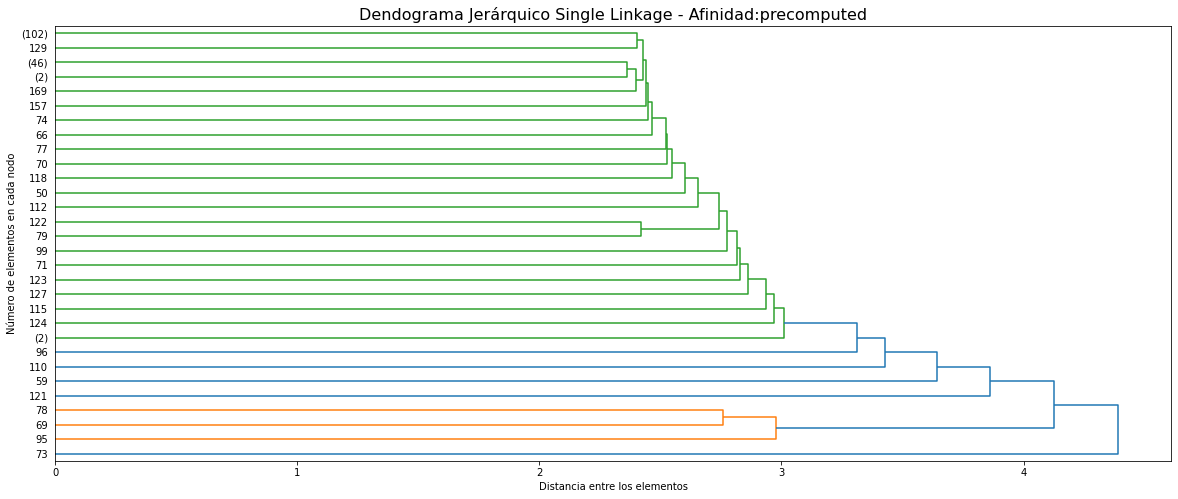

In [102]:
X = datosTransformados

afinidades = ['euclidean','l1','l2','manhattan','precomputed']
i = 0;
j = 0;
for afinidad in afinidades:
    if afinidad == 'precomputed':
        #Calculamos matriz de distancias
        from scipy.spatial import distance_matrix
        print('Calculando Matriz de Distancias...')
        X = pd.DataFrame(distance_matrix(datosTransformados.values, datosTransformados.values),
                         index=datosTransformados.index, columns=datosTransformados.index)
    model = AgglomerativeClustering(affinity=afinidad, distance_threshold=0, n_clusters=None, linkage='single')
    model = model.fit(X)
    plt.figure(figsize=(20, 8))
    plt.title('Dendograma Jerárquico Single Linkage - Afinidad:'+afinidad, size='16')
    # plot the top three levels of the dendrogram
    plot_dendrogram(model, truncate_mode='lastp', count_sort='ascending', orientation='right')
    plt.ylabel("Número de elementos en cada nodo",size='10')
    plt.xlabel("Distancia entre los elementos",size='10')
    plt.show()

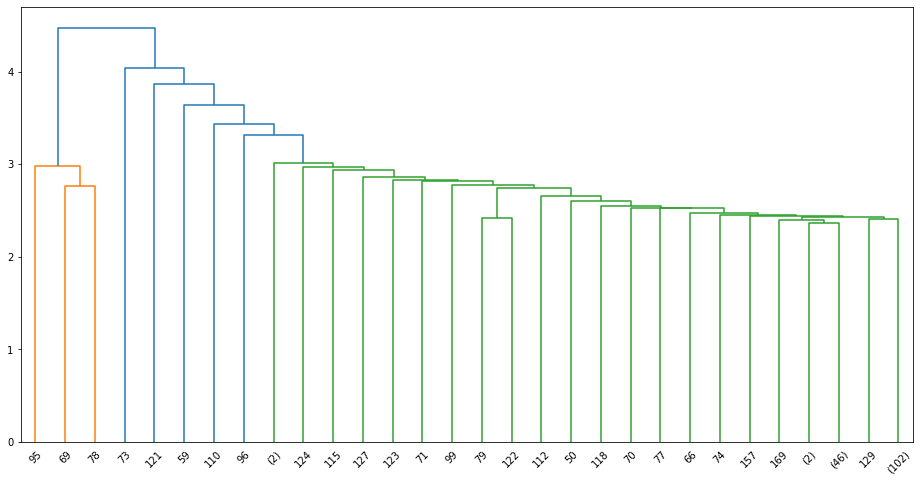

In [139]:
from scipy.cluster.hierarchy import centroid, fcluster
from scipy.spatial.distance import pdist

y = pdist(datosTransformados)
Z = centroid(y)
T = hierarchy.linkage(y, 'single')
plt.figure(figsize=(16, 8))
dn = hierarchy.dendrogram(T, truncate_mode='lastp',count_sort='ascending')

### Nos vamos a quedar con Afinidad Euclidean

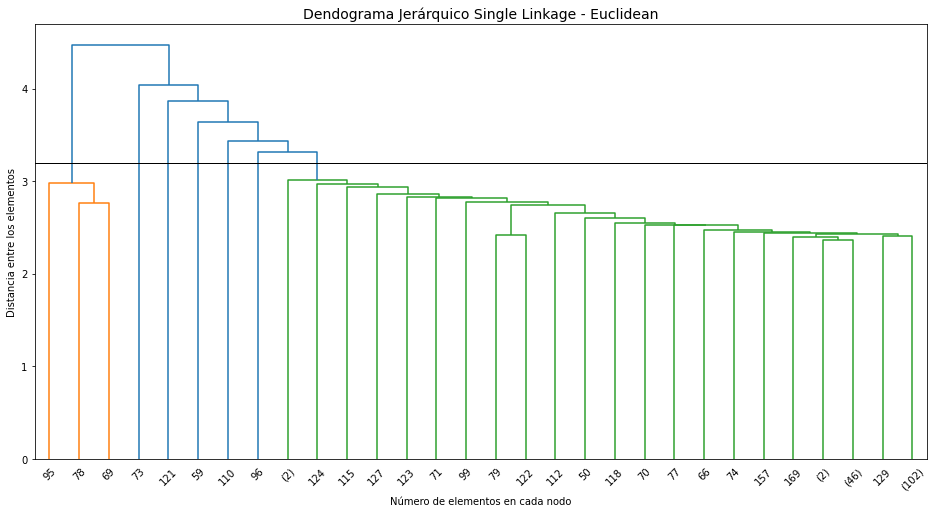

In [143]:
model = AgglomerativeClustering(affinity='euclidean', distance_threshold=0, n_clusters=None, linkage='single')
model = model.fit(datosTransformados)
plt.figure(figsize=(16, 8))
plt.title('Dendograma Jerárquico Single Linkage - Euclidean', size='14')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='lastp',count_sort='ascending')
plt.xlabel("Número de elementos en cada nodo")
plt.ylabel('Distancia entre los elementos')
plt.plot([0,300], [3.2,3.2], color='black', linewidth=1)
plt.show()

### Al realizar el corte, obtenemos dos grupos, y 4 valores atípicos. Los grupos son el color verde y el color naranja, mientras que los valores atípicos son los vinos en la posición 73, 121, 59, 110 y 96

In [145]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='single')
predicciones = cluster.fit_predict(datosTransformados)
predicciones = predicciones.reshape(-1,1)

KeyError: (0, 0)

<Figure size 432x288 with 0 Axes>

In [105]:
datosTransformados['Grupo'] = predicciones
datosTransformados

,0,1,2,3,4,5,6,7,8,9,10,11,12,Grupo
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,0
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,0
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,0
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,0
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952,0
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893,0
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575,0
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498,0


In [130]:
#Vamos a representar los datos. Necesitamos transformar los datos a 2 componentes --> PCA
#Importamos Librería PCA de Scikit Learn
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(dataset)
principalDf = pd.DataFrame(data = principalComponents, columns = ['Componente 1', 'Componente 2'])
principalDf

,Componente 1,Componente 2
0,318.562979,21.492131
1,303.097420,-5.364718
2,438.061133,-6.537309
3,733.240139,0.192729
4,-11.571428,18.489995
...,...,...
173,-6.980211,-4.541137
174,3.131605,2.335191
175,88.458074,18.776285
176,93.456242,18.670819


In [154]:
# Visualize the clustering
def plot_clustering(principalDf, labels, title=None):
    x_min, x_max = np.min(principalDf, axis=0), np.max(principalDf, axis=0)
    principalDf = (principalDf - x_min) / (x_max - x_min)

    plt.figure(figsize=(6, 4))
    for i in range(datosTransformados.shape[0]):
        plt.text(principalDf[i, 0], principalDf[i, 1], str(y[i]),
                 color=plt.cm.nipy_spectral(labels[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title, size=17)
    plt.axis('off')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

In [155]:
clustering.labels_ = ['A','B','C']
for linkage in ('ward', 'average', 'complete', 'single'):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=10)
    clustering.fit(principalDf)
    plot_clustering(principalDf, clustering.labels_, "%s linkage" % linkage)

KeyError: (0, 0)

<Figure size 432x288 with 0 Axes>

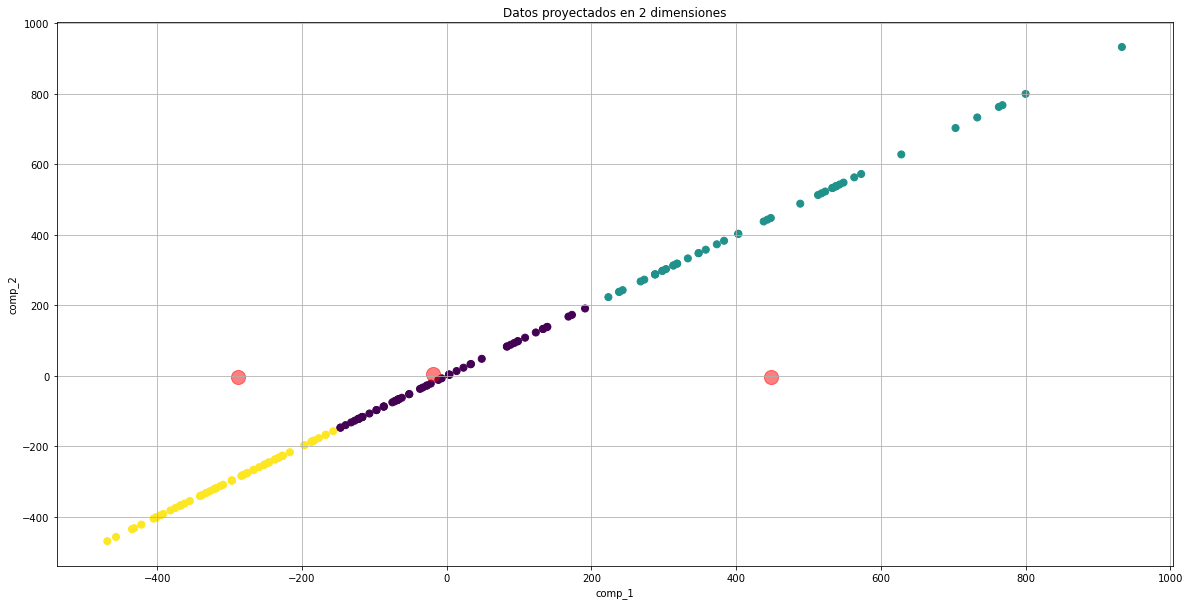

In [131]:
from sklearn.cluster import KMeans
# Creación del modelo.
modelo = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300)
    
# Entrenamiento del modelo.
modelo.fit(principalComponents)

# Predicción de los grupos del dataset.
prediccion = modelo.predict(principalComponents)

# Dibujamos el mapa de agrupaciones.
fig, ax = plt.subplots(figsize=(20, 10))
#Pintamos los elementos
plt.scatter(principalDf['Componente 1'], principalDf['Componente 1'], c=prediccion, s=50, cmap='viridis')
#Pintamos los clusters
#Calculamos los centroides y los añadimos al mapa.
centroides = modelo.cluster_centers_
plt.scatter(centroides[:, 0], centroides[:, 1], c='red', s=200, alpha=0.5)
plt.grid(True)
plt.xlabel('comp_1')
plt.ylabel('comp_2')
plt.title('Datos proyectados en 2 dimensiones')
plt.show()
    
# Guardamos la suma del cuadrado de las distancias de las muestras al centroide más cercano.
distancias = modelo.inertia_